## Handwritten Digits recognition : 
### Using Unsupervised Learning for data preprocessing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
% matplotlib inline

In [3]:
# Step 1: Get the data
digits_train=pd.read_csv("train.csv")
digits_test=pd.read_csv("test.csv")

In [31]:
# Analyze the data - Different type of analysis
# 1. Shape of data
print(digits_train.shape)
# 2. Check for any null value
#print(len(digits_train.isnull()==True))
# 3. Check for a majority class
digits_class=digits_train.iloc[:,:1].as_matrix().flatten()

(42000, 785)


In [58]:
digits_class=np.unique(digits_class)
print(digits_class)

[0 1 2 3 4 5 6 7 8 9]


<Container object of 10 artists>

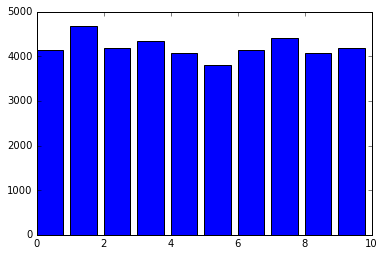

In [61]:
#This gives count of data belonging to all the classes of digits
class_count=[(digits_train.iloc[:,:1].as_matrix()==i).sum() for i in digits_class]
#plt.xticks(digits_class,class_count)
plt.bar(digits_class,class_count)

In [63]:
# Step 3: Split the data into training and testing 
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(digits_train.iloc[:,1:],digits_train.iloc[:,:1])

In [96]:
# Step 4: Preprocessing the data : Using PCA
from sklearn.decomposition import RandomizedPCA
pca=RandomizedPCA(n_components=500,whiten=True)
pca.fit(X_train)

RandomizedPCA(copy=True, iterated_power=3, n_components=500,
       random_state=None, whiten=True)

In [97]:
# transform the data to new shape
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [98]:
print(X_train_pca.shape,X_test_pca.shape)

(31500, 500) (10500, 500)


In [101]:
# Step 5: Build classifier based on the transformed data
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier(n_estimators=150,max_depth=50)
model1.fit(X_train,Y_train)

/Users/dhananjaymehta/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [102]:
model1.score(X_test,Y_test)

0.96514285714285719

In [89]:
prev=0.94933333333333336